<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>background information for homework assignment 5</font>

    
</center>


### <font color='darkblue'>Initializing and constructing dictionaries
    
Refresher for something you already had to deal with in hw 4. 

In [ ]:
from random import randint

filters = ['u', 'g', 'r', 'i', 'z', 'ugriz']
random_dict = {}

for f in filters: 
    random_dict[f] = randint(0, 10)
    
for f in filters: 
    print(f, random_dict[f])


u 2
g 4
r 8
i 3
z 2
ugriz 8


### <font color='darkblue'>Converting 2D list to a simple 1D list for easier processing
    
It is often easier to work with values in a simple 1D list than in a 2D list, such as image pixel values. 
For Python lists this can be done in a straightforward as shown below. 

In [ ]:
from random import random
# Initialize a 2D list with nrows rows and ncols columns filled with zeroes
nrows, ncols = 4, 3
xlist = [[random()]*ncols for x in range(nrows)]
print(xlist)

[[0.9156813586262141, 0.9156813586262141, 0.9156813586262141], [0.8331561117361265, 0.8331561117361265, 0.8331561117361265], [0.29567398440288073, 0.29567398440288073, 0.29567398440288073], [0.27960168146501563, 0.27960168146501563, 0.27960168146501563]]


In [ ]:
# the most straightforward way

def flatten_2d_list(x):
    '''Flatten input 2d list x into a simple 1d list 
    
    '''
    if x: 
        xflat = []
        for row in x:
            for col in row:  
                xflat.append(col)
    else: 
        xflat = x # empty is already flat enough
    return xflat

xf = flatten_2d_list(xlist)
print(xf)

[0.9156813586262141, 0.9156813586262141, 0.9156813586262141, 0.8331561117361265, 0.8331561117361265, 0.8331561117361265, 0.29567398440288073, 0.29567398440288073, 0.29567398440288073, 0.27960168146501563, 0.27960168146501563, 0.27960168146501563]


or we can just take a plunge and use NumPy:

In [ ]:
import numpy as np

# convert list to NP array, flatten, and convert result back to list
# if you don't list(), the result will be a NumPy array xf which you can use also of course
xf = list(np.array(xlist).flatten())

### <font color='darkblue'>A function to compute percentile of the distribution</font>

This is copied from <tt>07_mean_error</tt> notebook for convenience. 

A simple definition using $p = \mathrm{prc}/100$ for a sequence of length $n$, percentile $x_{\rm p}$ is defined as the value for which fraction $p$ of the sample has values $<x_{\rm p}$. If $x_i$ values are ***sorted***: 

$$x_{\rm p} =  x_{\mathrm{int}(np) - 1}$$

where 1 is subtracted because indices start at 0 in Python. 

I will adopt a particular commonly used definition which interpolates between the two values that are closest to the required percentage for a sample of $x_i$ ***sorted by their values*** of size $n$ is

$$x_{\rm p} =  \frac{1}{2} \left[x_{\mathrm{int}(np) - 1} + x_{\mathrm{int}(np)}\right].$$

In [ ]:
def xperc(x, prc = 50):
    """Compute value corresponding to the prc-th percentile (prc = [0,100] of values in x"""
    assert(0 <= prc <= 100)
    xc = x[:]
    xc.sort()
    
    nx = len(x)
    if nx == 1: return x
    
    # next line computes ceiling because indices start at 0 in Python
    nceil = int(prc * 0.01 * len(x))
    if nceil: # percentile sufficiently large
        nfloor = nceil - 1 # this is floor index
        return 0.5 * (xc[nfloor] + xc[nceil])
    else:
        return xc[0] # if percentile is sufficiently small for the x length, don't interpolate

### <font color='darkblue'>Mean, median, variance with NumPy</font>

NumPy has functions for computing mean, median, variance, and standard deviation for a sequence of numbers in a numpy array. 

In [ ]:
nr=100
xr = np.random.uniform(size = nr)

xmean = np.mean(xr) # sample mean
xmed  = np.median(xr) # sample median
xvar  = np.var(xr, ddof=1) # computes variance as sum((x-mean)**2)/(n-ddof), default is ddof=0
xstd  = np.sqrt(xvar) # sample st deviation
xstd2 = np.std(xr, ddof=1) # sample st deviation can also be computed this way
print(xmean, xmed, xvar, xstd, xstd2)

0.5055791169973731 0.5138001297194194 0.09842936845154014 0.31373455093683916 0.31373455093683916


### <font color='darkblue'>Computing percentile of the distribution with a NumPy function</font>

We can use a list directly with the [<tt>np.percentile</tt> function](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) like this:  

In [ ]:
import numpy as np

# 50-th and 75-th percentiles of values in xlist
print(np.percentile(xlist, 50), np.percentile(xlist, 75))

0.5644150480695036 0.8537874234586484


### <font color='darkblue'>Controlling transparency of the plotted objects in Matplotlib

Most Matplotlib plotting methods (hist, plot, scatter, etc) have a parameter <tt>alpha</tt> ($\in [0,1]$) that controls transparency of what's plotted (alpha=0 is fully transparent, while alpha=1 is opaque). 
    
This can be used to make multiple overlapping plotted objects visible. 
    
For example, in plotting multiple histograms. 

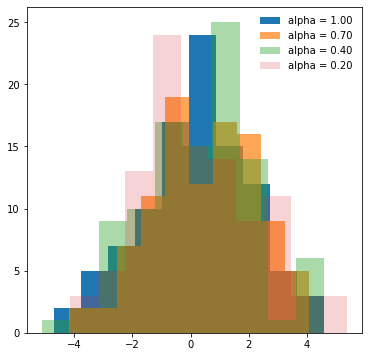

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))

# when plotting plot opaque objects first, and more transparent ones later
for alpha in [1., 0.7, 0.4, 0.2]:
    # draw 100 random values from Gaussian pdf with mu=0, sigma=2
    xs = np.random.normal(loc=0., scale=2., size=100)
    plt.hist(xs, alpha=alpha, label='alpha = {:.2f}'.format(alpha))
    
plt.legend(loc='best', frameon=False)
plt.show()

### <font color='darkblue'>Loading SDSS images from the SDSS data server

Images obtained by the SDSS are public and are arranged by tiles and frames for the Data Release 12 (DR12) in the [Flexible Image Transport System (FITS)](https://fits.gsfc.nasa.gov/) format are stored at the following URL: 
    
    https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/
    
The URL to individual frames looks like this
    
    https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4263/6/frame-r-004263-6-0254.fits.bz2
    
where 4263 is the field number, 6 is the camera column (camcol) number, r is the name of the filter - a single lower-case character: u, g, r, i or z, 004263 - a 6-character string containing leading 0's and then the field number, CAMCOL number (1-digit number 1 to 6), image (frame) number 0254 consisting of 4 characters with leading 0s and number that can contain 2 to 4 digits.  
    
Functions for reading images in the [FITS format](https://fits.gsfc.nasa.gov/) exist in different Python modules, including the main astronomical Python module [Astropy](https://www.astropy.org/). Example of how to use it to load images is shown below. 

**_Note_**: if you don't have [Astropy](https://www.astropy.org/) module installed, please follow instructions at its website to install it as we will be using it frequently from now on. 

In [ ]:
from astropy.io import fits

url = 'https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/4263/6/frame-r-004263-6-0253.fits.bz2'
    
fimg = fits.open(url) # open FITS file at the URL address in the string url
image = fimg[0].data.tolist() # save image itself as a 2D list (list of lists)

# Number of rows and columns (dimensions)
nrow, ncol = len(image), len(image[0])
print('loaded FITS image of {:d} x {:d} pixels'.format(nrow,ncol))

loaded FITS image of 1489 x 2048 pixels


If we display this image, it looks just black. 

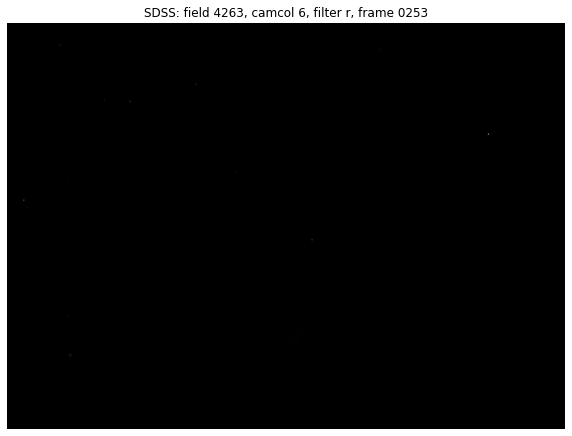

In [ ]:
from matplotlib import pylab as plt

field, camcol, f, frame_number = '4263', '6', 'r', '0253'

# Define a single panel plot of a given size
fig, ax = plt.subplots(1,1, figsize=(10,10))
# Display image in list image using 'gray' colormap
ax.imshow(image, cmap='gray', origin='lower') 
_ = ax.axis('off') # Do not plot axis ticks
# Display plot title with the specified string
ax.set_title('SDSS: field {:s}, camcol {:s}, filter {:s}, frame {:s}'.format(field, camcol, f, frame_number))
plt.show() # Show the plot

We can plot the image better by setting minimum and maximum values of pixel values used in colormap to better values. For example: 

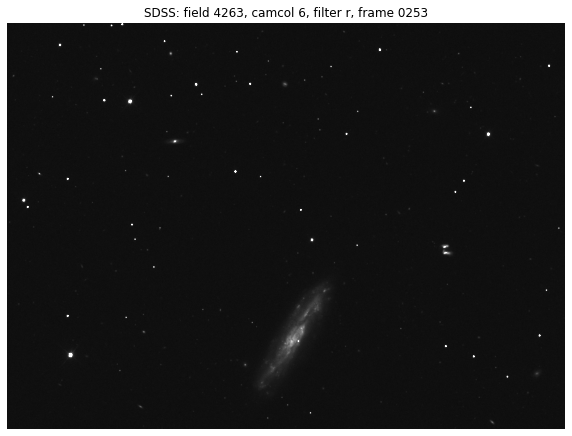

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image, cmap='gray', origin='lower', vmin=-0.13, vmax=2)
_ = ax.axis('off')
ax.set_title('SDSS: field {:s}, camcol {:s}, filter {:s}, frame {:s}'.format(field, camcol, f, frame_number))
plt.show()

Now sources are visible, but background is black and faint diffuse sources are difficult to see. 

This is typical when image pixel values are colored on *linear* strech of grayscale or some other [colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html), most pixels get nearly black color. For this reason such images are usually displayed on a [*logarithmic* stretch](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html#sphx-glr-tutorials-colors-colormapnorms-py). 

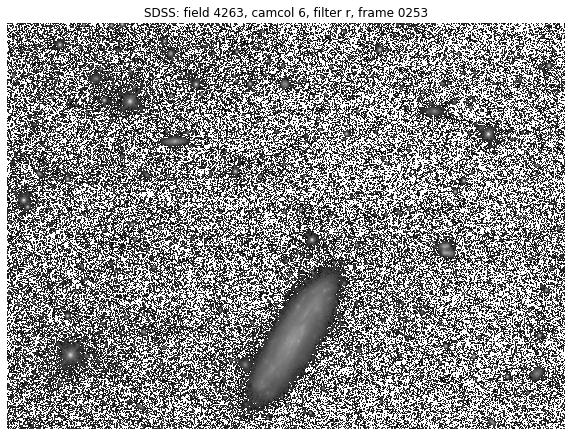

In [ ]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image, cmap='gray', origin='lower', norm=LogNorm())
_ = ax.axis('off')
ax.set_title('SDSS: field {:s}, camcol {:s}, filter {:s}, frame {:s}'.format(field, camcol, f, frame_number))
plt.show()

Now sources appear better, but background looks very noisy. This is because mean sky background value was subtracted from these images and some pixel values are negative. Negative values on logarithmic scale (when their logarithm is taken) produce NaN (Not a Number) values, because log of a negative value is not defined. The way to fix this is to find the minimum pixel value and subtract it from all the pixel values, so that that pixels have $\geq 0$ values. 

This can be done using loops via list elements in several different ways from the most straightforward but relatively verbose using for loops with range, to compact way using list compehension, as shown below. 

In [ ]:
# some suitably large number for initialization
# this one happens to be the dynamical mass of the big galaxy in the image above
# in units of the Sun's mass. 
imin = 1.e12 

# find minimum pixel value 
for i in range(nrow): 
    for j in range(ncol):
        if image[i][j] < imin:
            imin = image[i][j]
            
# Now subtract the minimum value from each pixel
for i in range(nrow): 
    for j in range(ncol):
        image[i][j] -= imin

or this can be done as 

In [ ]:
imin = 1e12

for row in image: 
    for x in row: 
        if x < imin: imin = x

flat_image = []
for i, row in enumerate(image): 
    for j, x in enumerate(row): 
        image[i][j] -= imin 
        flat_image.append(image[i][j])

or this can be done as follows using [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [ ]:
# Determine the minimum of image pixel values using "list comprehension"
imin = min([min(row) for row in image]) # min() is a built-in function for finding minimum of a simple list

# Subtract the minimum from each image pixel using nested list comprehension
image = [[(x - imin) for x in row] for row in image]

Displaying image now makes it look much nicer with many more faint sources visible. 

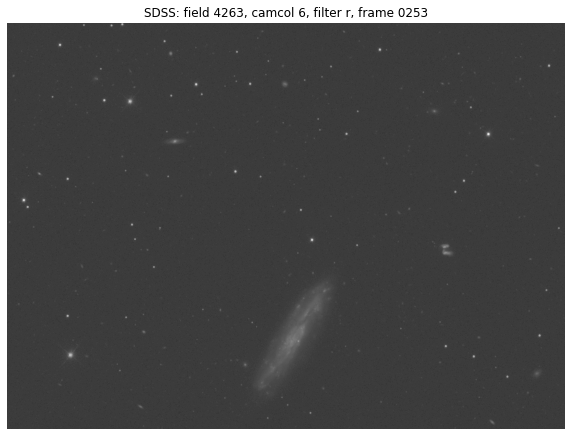

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image, cmap='gray', origin='lower', norm=LogNorm())
# it is common to assign unwanted output to variable names like _ 
_ = ax.axis('off')
ax.set_title('SDSS: field {:s}, camcol {:s}, filter {:s}, frame {:s}'.format(field, camcol, f, frame_number))
plt.show()

We can also use "inverted" gray scale with colormap "Greys", in which brighter regions are displayed as darker gray. 

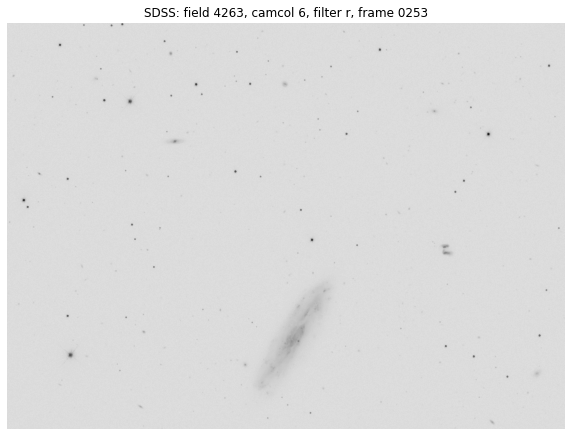

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(image, cmap='Greys', origin='lower', norm=LogNorm())
_ = ax.axis('off')
ax.set_title('SDSS: field {:s}, camcol {:s}, filter {:s}, frame {:s}'.format(field, camcol, f, frame_number))
plt.show()